# Biomedical acquisition and processing

In this collection of notebooks you will find support for code and visualization on the corresponding topics of the presentation.
This one contemplates the third series of notebooks from the following list:

* Signals
* Acquisition System
* __Processing__

## Processing

This notebook will regard some methods for signal processing in the statistical, time and frequency domains.
* The code that generated the figures will be shown further.
* Some figures that are not generated by code can be found at: [/figures](https://github.com/novabiosignals/BSAP-Presentation/tree/master/figures/Processing)

In [9]:
#import dependencies
from pylab import *
import scipy as sp
import numpy as np
from novainstrumentation import smooth


#inline plots
%matplotlib inline

In [12]:
#Configure python plots
rc('lines',linewidth=2,color='k')

rc('font',**{'family':'serif','serif':['Palatino']})
rc('font',style='italic', size=10)


rc('text', color='grey')

#rc('text', usetex=True)

rc('figure', figsize= (12, 5), dpi=80) 
rc('axes', grid= True, edgecolor= 'grey', labelsize=10,)
rc('grid', color= 'grey', linestyle='dotted')
rc('xtick',color= 'grey', labelsize=10)
rc('ytick',color= 'grey', labelsize=10)

close('all')

## Statistical Domain

### Amplification

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


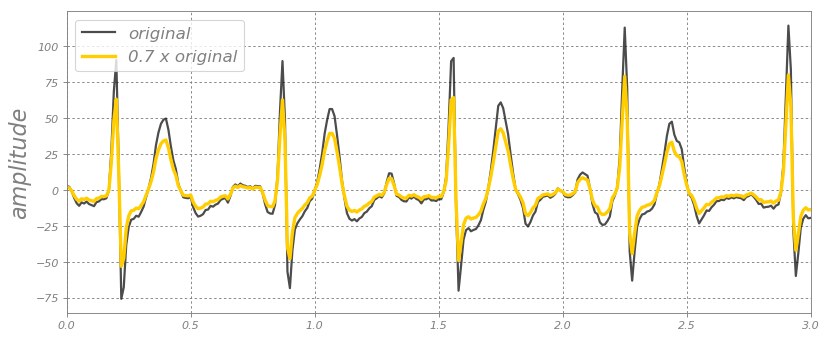

In [13]:
[t,s] = np.loadtxt('data/cleanecg.txt.gz')
c = 0.7
sA = 0.7*s
plot(t,s, linestyle='-', color='black', alpha=0.7, label='original')
plot(t, sA, linestyle='-', linewidth=3, color='#ffcd00', label='0.7 x original')
axis([0,3,min(s)-10, max(s)+10])
ylabel('amplitude', color='grey', fontsize=20)
grid(linestyle='dotted')
legend(fontsize=15)

### Rectification

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


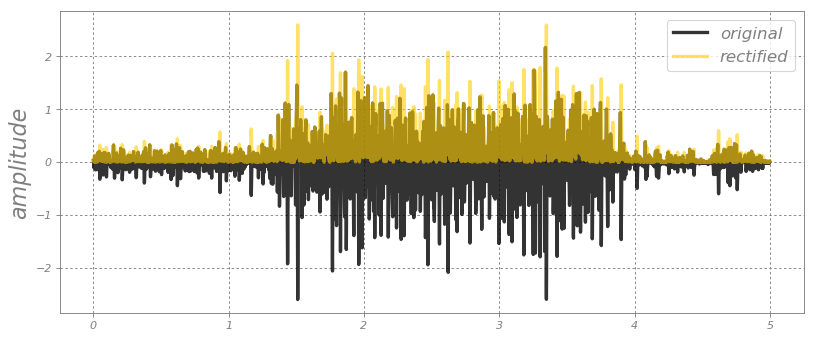

In [14]:
[t, s] = np.loadtxt('data/emg.txt.gz')
sA = np.abs(s)
plot(t, s, linestyle='-', linewidth=3, color="k", alpha=0.8,label='original')
plot(t, sA, '#ffcd00', alpha=0.6, linewidth=3, label='rectified')
ylabel('amplitude', color='grey', fontsize=20)
legend(fontsize=15)

### Amplitude Normalization

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


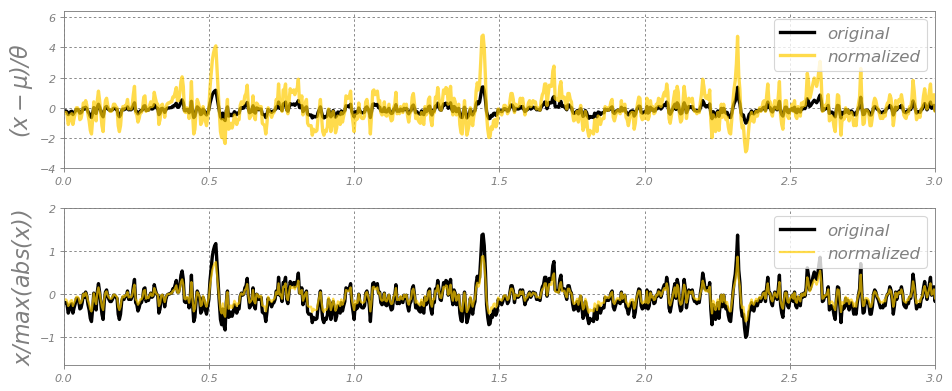

In [15]:
[t, s] = np.loadtxt('data/noisyecg.txt.gz')
s = 100*s
#1 - mean
s1 = (s-np.mean(s))/std(s)
a = subplot(2,1,1)
a.plot(t, s, linestyle='-', linewidth=3, color='k', label='original')
a.plot(t,s1, '#ffcd00', label='normalized', linewidth=3, alpha=0.7)
a.axis([0, 3, min(s1)-1, max(s1) + 1])
ylabel(r'$(x-\mu)/\theta$', color='grey', fontsize=20)
legend(fontsize=15)
#2 - norm 2
s2 = s/max(abs(s))
b = subplot(2, 1, 2)
b.plot(t, s, color='k', label='original', linewidth=3)
b.plot(t, s2, linestyle='-',color='#ffcd00', label='normalized', alpha=0.7)
b.axis([0, 3, min(s2) - 1, max(s2) + 1])
ylabel(r'$x/max(abs(x))$', color='grey', fontsize=20)
legend(fontsize=15)

tight_layout()

### Average Removal

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


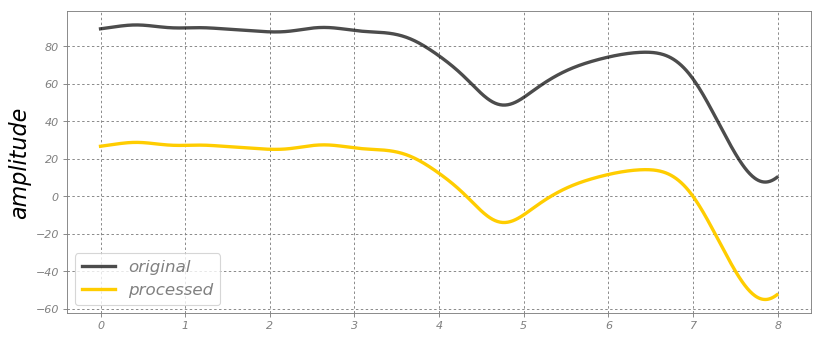

In [16]:
[t, s] = np.loadtxt('data/resp.txt.gz')
s = smooth(s, 100)-min(s)
plot(t[0:800],s[0:800], color='k', alpha=0.7, label='original', linewidth=3)
sm = s-np.mean(s)
plot(t[0:800],sm[0:800], color='#ffcd00', label='processed', linewidth=3)
ylabel('amplitude', fontsize=20)
legend(fontsize=15)

## Time Domain

### Smoothing

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


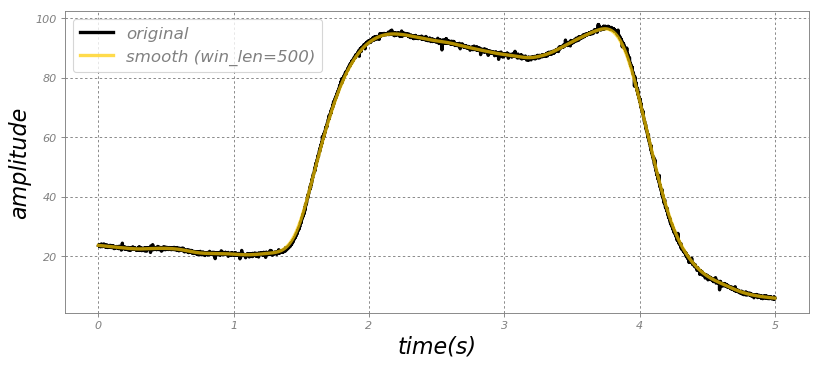

In [17]:
[t, s] = np.loadtxt('data/force.txt.gz')
sS = smooth(s, 250)
plot(t, s, linestyle='-', linewidth=3, color='k', label='original')
plot(t, sS, linestyle='-', linewidth=3, color='#ffcd00', label='smooth (win_len=500)', alpha=0.7)
legend(fontsize=15)
ylabel('amplitude', fontsize=20)
xlabel('time(s)', fontsize=20)
show()

### Derivative

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


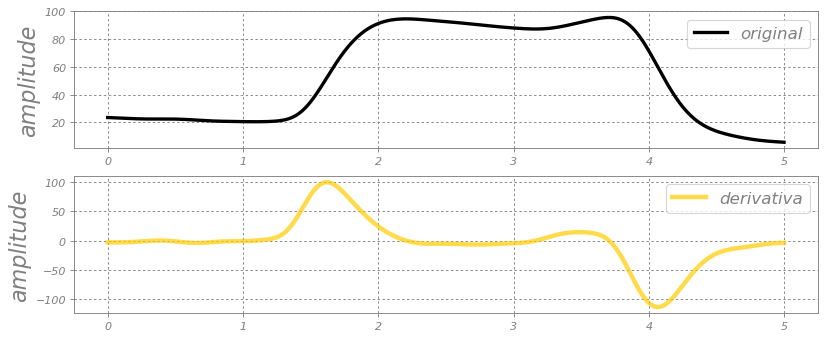

In [18]:
[t, s] = np.loadtxt('data/force.txt.gz')
s = smooth(s, 500)
sd = np.diff(s)
a = subplot(2,1,1)
a.plot(t, s, linestyle='-', linewidth=3, color='black', label='original')
ylabel('amplitude', color='grey', fontsize=20)
legend(fontsize=15)
b = subplot(2,1,2)
b.plot(t[:-1], 100*(sd/max(sd)), '#ffcd00', linewidth=4, alpha=0.7, label='derivativa')
ylabel('amplitude', color='grey', fontsize=20)
legend(fontsize=15)

### Time Normalization

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


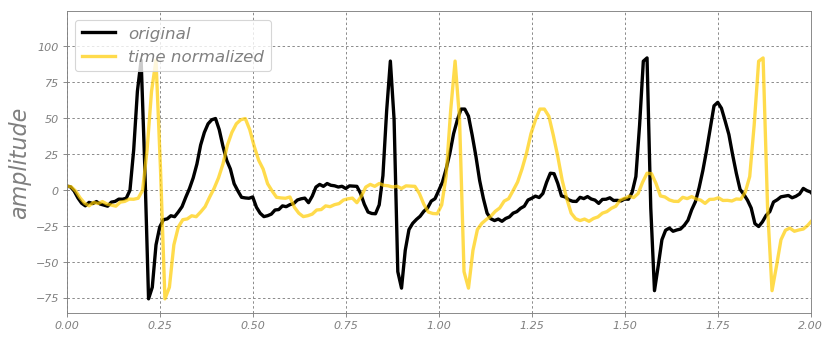

In [19]:
[t, s] = np.loadtxt('data/cleanecg.txt.gz')
st = 1.2*t
plot(t, s, linestyle='-', linewidth=3, color='black', label='original')
plot(st, s, '#ffcd00', linewidth=3, alpha=0.7, label='time normalized')
axis([0, 2, min(s) - 10, max(s) + 10])
ylabel('amplitude', color='grey', fontsize=20)
legend(fontsize=15)

### Integration

[2.35611433e+01 4.71192000e+01 7.06741739e+01 ... 2.70764258e+05
 2.70770065e+05 2.70775867e+05]


/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


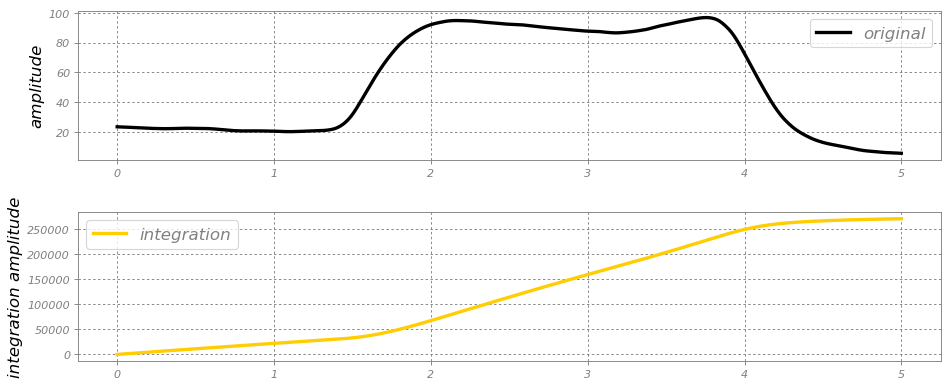

In [20]:
[t, s] = np.loadtxt('data/force.txt.gz')
s = smooth(s, 100)
s_in = np.cumsum(s)
print(s_in)
a = subplot(2,1,1)
a.plot(t, s, 'k', label='original', linewidth=3)
ylabel('amplitude', fontsize=15)
legend(fontsize=15)
b = subplot(2,1,2)
b.plot(t, s_in, '#ffcd00', label='integration', linewidth=3)
ylabel('integration amplitude', fontsize=15)
legend(fontsize=15)
tight_layout()

### Median Filter

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


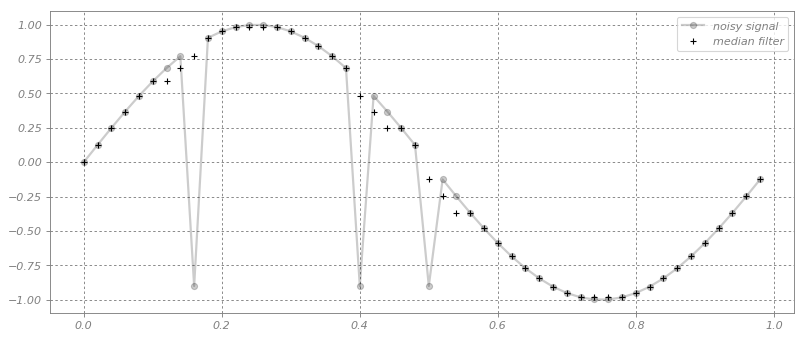

In [21]:
from scipy import signal
t = arange(0, 1, 0.02)
s = sin(2 * pi * t)

s[ [8,20,25] ] = -0.9

ns = signal.medfilt(s, 5)

plot(t, s, 'k.-', lw=2, ms=11, alpha=.2)
plot(t, ns, 'k+', lw=2, ms=6)

legend(['noisy signal', 'median filter'])

# Frequency Domain

## Finite Impulse Response Filters

![filter](figures/Processing/FIR.png)

## Infinite Impulse Response Filters

![iirI](figures/Processing/IIRDF1.png)

![iirII](figures/Processing/IIRDF2.png)

## Linear Filters

![filters](figures/Processing/filtros-en-1.png)

### Low Pass

In [16]:
def lowpass(s,f,order=2,fs=1000.0):
    b,a=sp.signal.butter(order,f/fs)
    return sp.signal.lfilter(b,a,s)

### Band Pass

In [17]:
def highpass(s,f,order=2,fs=1000.0):
    b,a=sp.signal.butter(order,f/fs,btype='highpass')
    return sp.signal.lfilter(b,a,s)

### Band Stop

In [18]:
def bandstop(s,f1,f2,order=2,fs=1000.0):
    b,a=sp.signal.butter(order,[f1/fs,f2/fs],btype='bandstop')
    return sp.signal.lfilter(b,a,s)

### High Pass

In [19]:
def bandpass(s,f1,f2,order=2,fs=1000.0):
    b,a=sp.signal.butter(order,[f1/fs,f2/fs],btype='bandpass')
    return sp.signal.lfilter(b,a,s)

### Signal Example

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


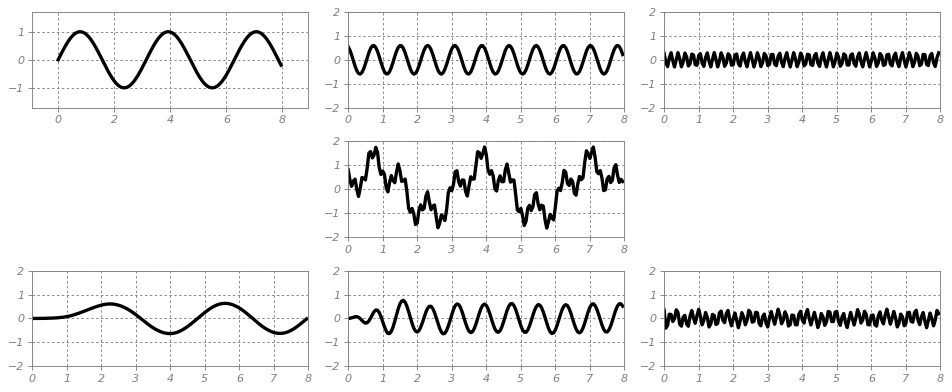

In [27]:
subplot(331)
    
t = arange(0.0, 8, 0.05)
l = len (t)
x1 = sin(t*2) 
plot(t, x1, 'k', linewidth=3)
axis('equal')
axis((0,8,-2,2)) 

subplot(332)
x2 = sin(t*2*4+2)*0.6
plot(t, x2, 'k', linewidth=3)
axis((0,8,-2,2)) 

subplot(333)
x3 = sin(t*2*15-243)*0.3

plot(t, x3, 'k', linewidth=3)
axis((0,8,-2,2))   

subplot(335)
s=x1+x2+x3
    
plot(t, s, 'k', linewidth=3)
axis((0,8,-2,2))     

subplot(337)
plot(t,lowpass(s,30,4), 'k', linewidth=3)
axis((0,8,-2,2))    


subplot(338)
plot(t,bandpass(s,30*2,100*2,4), 'k', linewidth=3)
axis((0,8,-2,2))     

subplot(339)
plot(t,highpass(s,100*2,4), 'k', linewidth=3)
axis((0,8,-2,2))    

tight_layout()

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


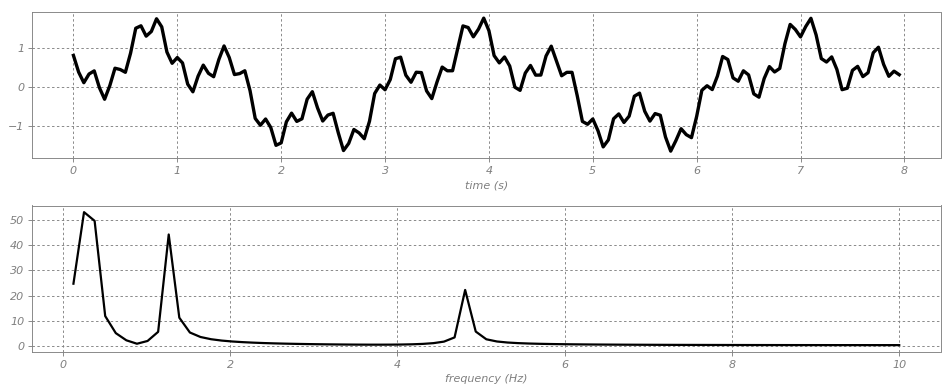

In [28]:
def plotfft(s, fmax):
    fs=abs(fft(s))
    f=linspace(0,fmax/2,len(s)/2)
    plot(f[1:int(len(s)/2)],fs[1:int(len(s)/2)], linewidth=2, color='k')

s=x1+x2+x3
    
subplot(212)
plotfft(s, 20)
xlabel('frequency (Hz)',color='grey')

subplot(211)
plot(t, s, 'k', linewidth=3)
xlabel('time (s)',color='grey')

tight_layout()

### Filtfit

/home/jean/.local/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


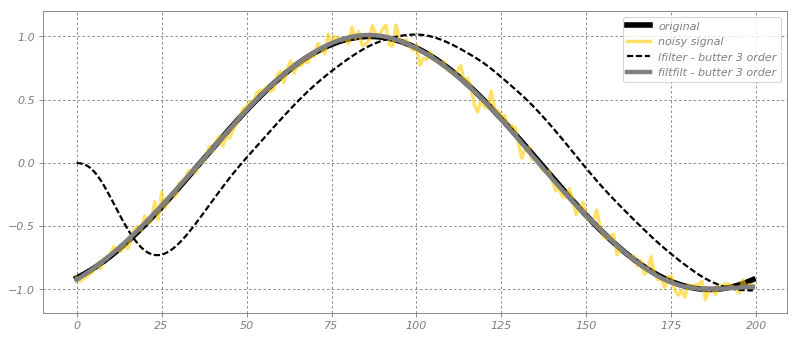

In [7]:
from scipy.signal import butter, lfilter, filtfilt

t=arange(-1,1,.01)
x=sin(2*pi*t*.5+2)
#xn=x + sin(2*pi*t*10)*.1
xn=x+randn(len(t))*0.05

[b,a]=butter(3,0.05)

z=lfilter(b,a,xn)
y=filtfilt(b,a,xn)



plot(x,'k', linewidth=5)
# hold(True)
plot(xn,color='#ffcd00', alpha=0.6, linewidth=3)
plot(z,color='k', linestyle='--')
plot(y, color='grey', linewidth=4)

legend(('original','noisy signal','lfilter - butter 3 order','filtfilt - butter 3 order'))